## 1) Exploratory Data Analysis - Prudential Life

Importing relevant packages:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

Loading data into CSV:

In [3]:
ins_train_data = './dataset/train.csv'
ins_test_data = './dataset/test.csv'
ins_train = pd.read_csv(ins_train_data)
ins_test = pd.read_csv(ins_test_data)

Checking size of data we have:
   - Looks like our training data has around 60,000 row and 127 columns

In [4]:
print(ins_train.shape)
print(ins_test.shape)

(59381, 128)
(19765, 127)


Preview of our data to get a better understanding of what we are working with:

In [5]:
ins_train.head(5)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


- Aside from Product Info 2, all columns are float or integers.
- All data has been normalised.
- We will make some general assumptions given lack of information. All columns will be considered continuous except Integer columns with 3 or less unique values will be considered categorical.
- Id column is irrelevant and can be dropped.
- Response column is our target - This looks like a categorisation problem.

In [6]:
ins_train.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

Having a quick look at some descriptive statistics. Too many columns to make any meaningful comparisons however.

In [7]:
ins_train.drop('Id',axis=1,inplace=True)
ins_test.drop('Id',axis=1,inplace=True)

In [8]:
ins_train['Product_Info_2'] = ins_train['Product_Info_2'].factorize()[0]

Product Info 2 looks like product categories. Using factorize to conver the column for further analysis.

In [9]:
null_cols=[]
for i in ins_train.columns:
    if ins_train[i].isnull().sum() > 0:
        null_cols.append(i)
        print(i,ins_train[i].isnull().sum())

Employment_Info_1 19
Employment_Info_4 6779
Employment_Info_6 10854
Insurance_History_5 25396
Family_Hist_2 28656
Family_Hist_3 34241
Family_Hist_4 19184
Family_Hist_5 41811
Medical_History_1 8889
Medical_History_10 58824
Medical_History_15 44596
Medical_History_24 55580
Medical_History_32 58274


13 Columns with null values. As the data comes from application forms, it is reasoned that null represents a lack of response, which would be considered a 0.

In [10]:
for i in range(2,6):
    ins_train['Family_Hist_%i' % i] = ins_train['Family_Hist_%i' % i].fillna(0)
    ins_test['Family_Hist_%i' % i] = ins_test['Family_Hist_%i' % i].fillna(0)

for i in [1,10,15,24,32]:
    ins_train['Medical_History_%i' % i] = ins_train['Medical_History_%i' % i].fillna(0)
    ins_test['Medical_History_%i' % i] = ins_test['Medical_History_%i' % i].fillna(0)

for i in [1,4,6]:
    ins_train['Employment_Info_%i' % i] = ins_train['Employment_Info_%i' % i].fillna(0)
    ins_test['Employment_Info_%i' % i] = ins_test['Employment_Info_%i' % i].fillna(0)

ins_train['Insurance_History_5'] = ins_train['Insurance_History_5'].fillna(0)
ins_test['Insurance_History_5'] = ins_test['Insurance_History_5'].fillna(0)

Converting all null values to 0.

Let us first start with the Response column and get a better understanding of our target.

C:\Users\Roy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


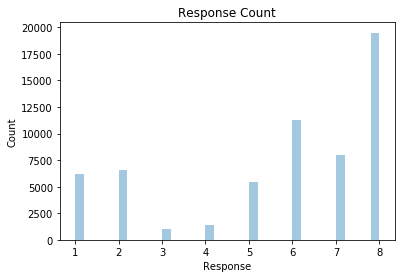

In [11]:
ax=sns.distplot(ins_train.Response,kde=False)
plt.title('Response Count')
ax.set(xlabel='Response', ylabel='Count')
plt.show()

- Again, we are looking at 8 different categories here.
- Looks like I have significantly lower amounts of response 3 and 4. I will need to be aware of class imbalance when modelling.
- The question to ponder here is whether this is indicative of the population that is applying for insurance. That is, are we seeing mostly people who are very unlikely to make an insurance claim, and those that are very likely to make an insurance claim to be more likely to apply for insurance? Do we have selection bias?

The most intuitive columns are Age, Weight, Height and BMI. I am most interested in Age and BMI. Weight and height are used to calculate BMI which tells a better story of a person's health. Let's have a closer look at these two variables and how it relates to our target, Response.

My initial assumption is that the higher the response, the riskier the customer application. This means an older customer and/or a customer with higher BMI will have a higher response given they are more likely to make a claim (more risky).

Let's start with Age:

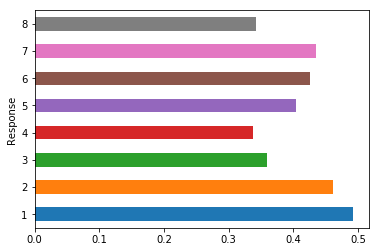

In [12]:
ins_train.groupby('Response')['Ins_Age'].mean().plot(kind='barh')

- Interestingly the average age of those who scored a response of 1 is higher while the average age of those in the Response 8 group have the lowest mean age. This suggests that a low response category (1) is actually higher risk.
- Unexpectedly, the relationship was not as linear as I would have expected. There could be a number of reasons for this however. For example, different age groups may exhibit different levels of risky behavour, thereby affecting the response rate.
- Assuming we are starting with an age of 18 (which is legal age) to age 65 where you would not be able to purchase anymore cover. Younger age groups on average may exhibit riskier behavour such as speeding and excessive drinking.

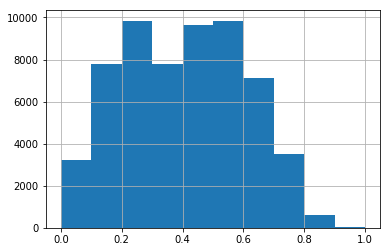

In [13]:
ins_train.Ins_Age.hist()

Having a look at the distribution of age, we have something that resembles a bell curve. As expected, we are seeing a steep decline in customers as age increases given the unlikelhood of getting insurance cover and also potentially an indication of more people being more established financially, or perhaps having existing cover already.

Let's turn our attention to BMI now:

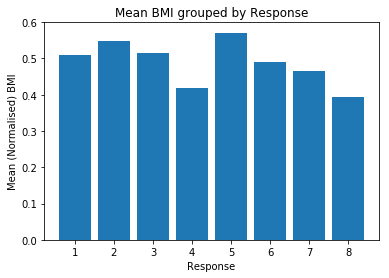

In [36]:
plt.bar(x=range(1,9),height=ins_train.groupby('Response')['BMI'].mean())
plt.title('Mean BMI grouped by Response')
plt.xlabel('Response')
plt.ylabel('Mean (Normalised) BMI')

plt.show()

Response group 8 looks like it has the lowest average BMI. This implies that our previous observation may be correct (that higher response means lower risk).

Again, was expecting to see a more linear pattern but this did not appear to be the case although there are clear differences between the different Response groups.

Next, wanted to have a quick look at the products and see if different product features might be selected together. For example, we might have something like a whole of life cover and sum insured CPI increase selected together.

In [15]:
product=ins_train[['Product_Info_1','Product_Info_2','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7']]

In [16]:
product.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7
0,1,0,10,0.076923,2,1,1
1,1,1,26,0.076923,2,3,1
2,1,2,26,0.076923,2,3,1
3,1,3,10,0.487179,2,3,1
4,1,4,26,0.230769,2,3,1


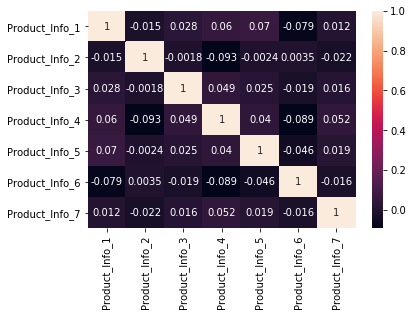

In [17]:
sns.heatmap(product.corr(),annot=True)

As can be in the above heatmap, there does not appear to be any correlation between the different product features.

Next thing to look at are the medical keywords. I am interested in seeing the most common keywords and least common keywords:

In [18]:
medical = []
for i in range(1,49):
    row = {}
    row['keyword'] = str('Medical_Keyword_%i' %i)
    row['count'] = ins_train['Medical_Keyword_%i' %i].sum()
    medical.append(row)

medical_keyword = pd.DataFrame(medical)
medical_keyword.sort_values('count',ascending=False).head()

,count,keyword
14,11310,Medical_Keyword_15
22,5806,Medical_Keyword_23
24,5312,Medical_Keyword_25
36,3954,Medical_Keyword_37
10,3445,Medical_Keyword_11


The most common keywords are 11,15,23,25 and 37.

In [19]:
medical_keyword.sort_values('count',ascending=False).tail()

,count,keyword
17,445,Medical_Keyword_18
34,412,Medical_Keyword_35
37,406,Medical_Keyword_38
8,395,Medical_Keyword_9
12,354,Medical_Keyword_13


The least common keywords are 9,13,18,35 and 38.

In [20]:
ins_train.groupby('Response')[['Medical_Keyword_11','Medical_Keyword_15','Medical_Keyword_23',
                               'Medical_Keyword_25','Medical_Keyword_37','Medical_Keyword_9','Medical_Keyword_13',
                              'Medical_Keyword_18','Medical_Keyword_35','Medical_Keyword_38']].mean()

,Medical_Keyword_11,Medical_Keyword_15,Medical_Keyword_23,Medical_Keyword_25,Medical_Keyword_37,Medical_Keyword_9,Medical_Keyword_13,Medical_Keyword_18,Medical_Keyword_35,Medical_Keyword_38
Response,,,,,,,,,,
1,0.070565,0.360561,0.160625,0.131142,0.116159,0.015305,0.009989,0.015305,0.010150,0.029483
2,0.066087,0.325397,0.119963,0.134310,0.093559,0.009615,0.008547,0.012210,0.013126,0.012210
3,0.051333,0.188549,0.245805,0.078973,0.080948,0.004936,0.007897,0.010859,0.008885,0.004936
4,0.052521,0.097339,0.144258,0.057423,0.037815,0.004902,0.006303,0.004202,0.003501,0.000000
5,0.068299,0.251473,0.080265,0.104381,0.066458,0.008100,0.007548,0.005891,0.007548,0.004050
6,0.054838,0.223449,0.131933,0.110567,0.060358,0.006677,0.007389,0.007211,0.008546,0.010238
7,0.052573,0.309829,0.075495,0.113367,0.060421,0.003364,0.006104,0.006229,0.012084,0.000000
8,0.053261,0.012674,0.053569,0.037816,0.049259,0.004054,0.002360,0.004618,0.000770,0.000051


Having a look at the frequency of occurance in each Response group, for all 10 medical keywords, we fid a similar pattern of more occurances with response 1 and as response rate increases to 8, the number of keywords found were reduced.

As there are a lot of columns, most of which are hard to decipher, rather than looking at each one individually, we will use Random Forest to attemp to identify the most important features:

In [21]:
x = ins_train.copy()
x = x.drop('Response',axis=1)
y = ins_train.Response.factorize()[0]

for c in x.columns[(x.dtypes =='int64') & (x.nunique()<4)]:
    x[c] = x[c].factorize()[0]

forest = RandomForestClassifier()
forest.fit(x,y)
    

C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

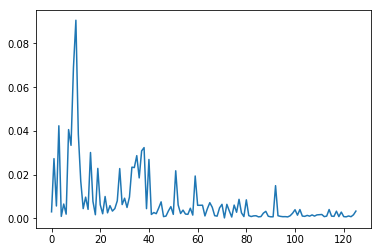

In [22]:
import numpy as np

plt.plot(forest.feature_importances_)
plt.show()

In [23]:
features = pd.DataFrame()
features['columns'] = x.columns.tolist()
features['importance'] = forest.feature_importances_

In [24]:
features.sort_values('importance',ascending=False,inplace=True)
features.head(10)

,columns,importance
10,BMI,0.090631
9,Wt,0.068992
3,Product_Info_4,0.042320
7,Ins_Age,0.040579
11,Employment_Info_1,0.038441
8,Ht,0.033359
38,Medical_History_2,0.032329
37,Medical_History_1,0.030823
16,Employment_Info_6,0.030090
35,Family_Hist_4,0.028653


- The top two featues seem to be BMI and weight. We have had a look at BMI already which is closely related to weight.
- Coming in forth was age which we also had looked at already.
- Height also made the top 10 list, but again, we had looked at BMI whichfactors in age.
- Next, I will focus on Product Info 4 and Employment Info 1 which came in at 3rd and 5th respectively.

In [25]:
features.tail()

,columns,importance
121,Medical_Keyword_44,0.000648
85,Medical_Keyword_8,0.000626
97,Medical_Keyword_20,0.000613
74,Medical_History_38,0.000558
71,Medical_History_35,0.000146


Just a quick look at the least important features which were interestingly all medical keywords and medical history.

In [26]:
ins_train.Product_Info_4.nunique()

1491

In [27]:
ins_train.Product_Info_4.value_counts()

0.076923    13279
0.230769    13115
0.487179     9685
1.000000     5808
0.282051     2862
0.128205     2546
0.743590     1481
0.179487     1423
0.384615     1353
0.025641     1044
0.000000     1036
0.333333     1011
0.102564      456
0.589744      431
0.794872      191
0.692308      182
0.435897      159
0.051282      153
0.153846      149
0.641026      105
0.538462       89
0.256410       78
0.846154       70
0.097436       64
0.358974       61
0.005128       60
0.087179       60
0.897436       58
0.307692       57
0.107692       52
0.205128       52
0.138462       42
0.035897       37
0.112821       34
0.092308       32
0.410256       32
0.158974       30
0.010256       29
0.117949       26
0.148718       26
0.143590       17
0.015385       16
0.164103       14
0.261538       14
0.312821       13
0.948718       13
0.189744       13
0.041026       13
0.666667       12
0.302564       11
0.461538       11
0.364103       11
0.246154       10
0.241026       10
0.343590       10
0.123077  

In [28]:
ins_train.groupby('Response').Product_Info_4.describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
1,6207.0,0.253302,0.251328,0.000000,0.076923,0.184615,0.282051,1.0
2,6552.0,0.249476,0.244698,0.000000,0.076923,0.230769,0.282051,1.0
3,1013.0,0.214227,0.233392,0.000000,0.076923,0.117949,0.230769,1.0
4,1428.0,0.256563,0.230453,0.076923,0.076923,0.230769,0.282051,1.0
5,5432.0,0.247066,0.262067,0.000000,0.076923,0.179487,0.333333,1.0
6,11233.0,0.339379,0.277443,0.076923,0.128205,0.230769,0.487179,1.0
7,8027.0,0.349039,0.280194,0.076923,0.128205,0.230769,0.487179,1.0
8,19489.0,0.399572,0.297285,0.076923,0.230769,0.282051,0.487179,1.0


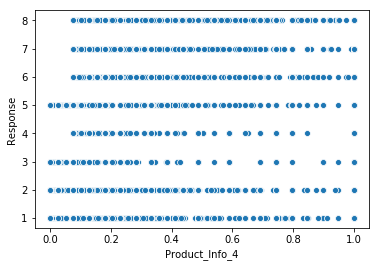

In [29]:
sns.scatterplot(x='Product_Info_4',y='Response',data=ins_train)

- From the above we can see that the average score for Product Info 4 was lower for Response groups 1, 2, 3, 4 and 5.
- This could be due to the minimum value of these groups being 0 compared to 0.076 for the other groups.
- Group 5 also had a minimum of 0.076. However, like group 3, we see that thescores are more skewed towards the lower end and is much more sparse towards the larger value resulting in a lower average.

Okay, so lets do some hypothesis testing to see if these differences are actually significant. Splitting the groups into two (one where the means were 0.2-0.29 and the other where the mean is higher, I chose to compare the group with the highest mean among the 0.2-0.29 group and the lowest mean of the second group.

In [30]:
stats.ttest_ind(ins_train[ins_train['Response']==6].Product_Info_4,ins_train[ins_train['Response']==4].Product_Info_4)

Ttest_indResult(statistic=10.815406846065933, pvalue=3.8239818756398425e-27)

H_0: The average product info score is the same for response group 4 and 6.
H_0: mu_group_4 - mu_group_6 = 0

H_A: The average product info score is different for response group 4 and 6.
H_A: mu_group_4 - mu_group_6 != 0

We will use an alpha of 0.05.

The result of our test is a P-value is lower than 0.05. That is, at a 95% confidence level, we reject our null hypothesis that the mean score for Response groups 4 and 6 are different.

Now, let's turn our attention to Employment Info 1:

In [31]:
ins_train.Employment_Info_1.nunique()

1936

In [32]:
ins_train.groupby('Response').Employment_Info_1.describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
1,6207.0,0.067740,0.077777,0.0,0.0265,0.050,0.083,1.0
2,6552.0,0.078758,0.088883,0.0,0.0350,0.060,0.100,1.0
3,1013.0,0.062757,0.073025,0.0,0.0300,0.050,0.075,1.0
4,1428.0,0.064233,0.061600,0.0,0.0330,0.050,0.080,1.0
5,5432.0,0.067637,0.072198,0.0,0.0300,0.050,0.080,1.0
6,11233.0,0.083565,0.083070,0.0,0.0400,0.065,0.100,1.0
7,8027.0,0.085155,0.087614,0.0,0.0400,0.065,0.100,1.0
8,19489.0,0.078199,0.082491,0.0,0.0350,0.060,0.100,1.0


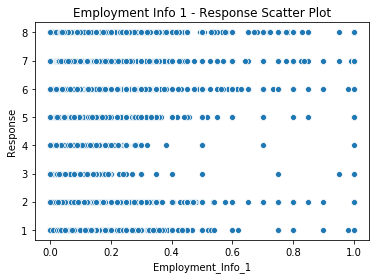

In [33]:
sns.scatterplot(x='Employment_Info_1',y='Response',data=ins_train)
plt.title('Employment Info 1 - Response Scatter Plot')
plt.show()

In [34]:
ins_train.Employment_Info_1.value_counts()

0.000000    3707
0.050000    3513
0.100000    3006
0.060000    2720
0.040000    2395
0.030000    1968
0.080000    1833
0.075000    1787
0.070000    1732
0.045000    1370
0.150000    1368
0.035000    1314
0.025000    1276
0.065000    1273
0.090000    1111
0.120000    1083
0.020000     982
0.055000     980
0.200000     907
0.085000     816
0.110000     688
0.125000     580
0.036000     543
0.250000     523
0.130000     513
0.048000     481
0.015000     471
0.052000     457
0.024000     430
0.140000     422
0.010000     416
0.042000     415
0.095000     394
0.032000     363
0.300000     351
0.038000     351
0.072000     327
0.160000     314
0.012000     304
0.180000     283
0.105000     264
0.028000     263
0.054000     247
0.018000     241
0.115000     234
0.062000     228
0.058000     226
0.026000     223
0.175000     209
0.022000     199
0.056000     191
0.170000     191
0.034000     189
0.046000     186
0.053000     184
0.078000     183
0.043000     182
0.033000     177
0.037000     1

- Again, we have similar observations to Product Info 4 above.
- The statistics shows us that Response groups 1,3,4,5 (with means below 0.78). The remaining groups scored a mean above 0.8.
- This is further emphasised by the scatter plot that shows response groups 1,3,4 and 5 values are much more concentrated towards the lower values.

With that said, we will again perform some hypothesis testing along the same lines as the above:

In [35]:
stats.ttest_ind(ins_train[ins_train['Response']==8].Employment_Info_1,ins_train[ins_train['Response']==5].Employment_Info_1)
#statistically significant

Ttest_indResult(statistic=8.566685644114902, pvalue=1.125717965075366e-17)

H_0: The average product info score is the same for response group 5 and 8.
H_0: mu_group_5 - mu_group_8 = 0

H_A: The average product info score is different for response group 5 and 8.
H_A: mu_group_5 - mu_group_8 != 0

We will use an alpha of 0.05.

The result of our test is a P-value is lower than 0.05. That is, at a 95% confidence level, we reject our null hypothesis that the mean score for Response groups 5 and 8 are different.